In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset/bank.csv


#### IMPORTING REQUIRED LIBRARIES

In [2]:
pip uninstall scikit-learn -y


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn==1.3.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 94.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import sklearn
import imblearn
print(sklearn.__version__)
print(imblearn.__version__)

1.3.2
0.13.0


In [5]:
# Cell 3: Your actual imports and code
# These imports should now work without the UnsetMetadataPassedError
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.exceptions import UnsetMetadataPassedError # This specific import should now work if needed



In [6]:
df = pd.read_csv("/kaggle/input/bank-marketing-dataset/bank.csv")
df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes


In [7]:
df.shape

(11162, 17)

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Interpreting Describe:

* The smallest age is 18 and the largest is 95
* On an average, people are having a balance of 1528.53 with max as $81,204 with minimum in default ($-6847)
* Probably a lot of outliers present as mean and std are far from max and min values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Checking for null values

In [10]:
df.isnull().sum()
#there are no missing values so no need for imputations

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [11]:
#checking if there are duplicated values
df.duplicated().sum()
#no duplicated rows

0

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='balance', ylabel='Count'>

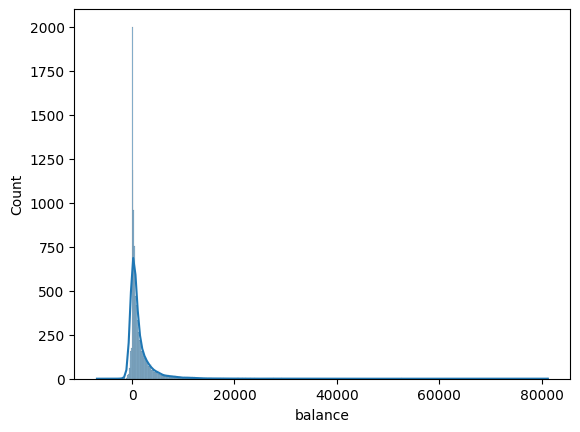

In [12]:
sns.histplot(data = df, x = "balance", kde=True)

# Interpretation of this plot above:

* A lot of concentration near 0 indicating that people have a balance of 0
* There is a long extended tail towards the right which indicated positive skeweness going all the way up to more than $80,000 which can show presence of outliers or extreme values which we do have in this case.
* Some balance values seems to be negative but not a lot as compared to peak at 0

## Things to interpret in terms of customers:
* Most customers have very little to no amount in the bank
* A small percentage of high value customers have higher account balance
* Some customers might be in overdraft

<Axes: ylabel='balance'>

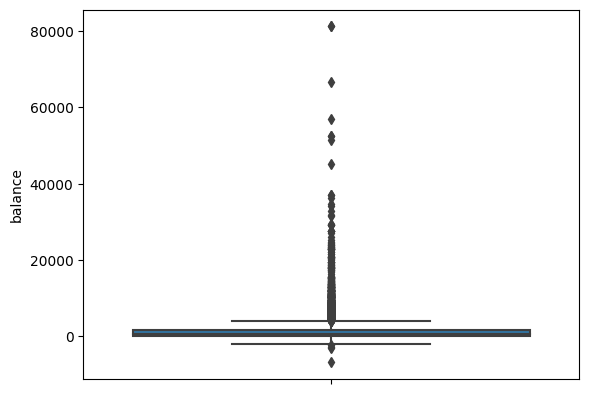

In [13]:
sns.boxplot(y = df["balance"],data = df)
#this plot futher confirms the finidings above

<Axes: xlabel='education', ylabel='count'>

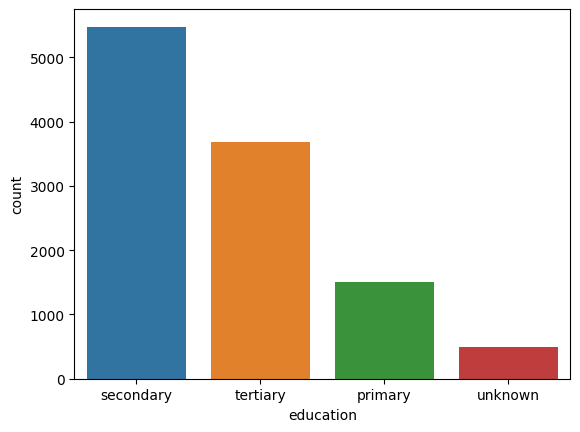

In [14]:
sns.countplot(x='education', data = df)
#people who owns the most accounts are having secondary education

([<matplotlib.patches.Wedge at 0x77fe9a233810>,
 [Text(-0.9480728310576615, 0.451284729422912, 'No Loan, No Default'),
  Text(0.9175417744690522, -0.5105067013313176, 'No Loan, Defaulted'),
  Text(1.0466975041649078, -0.08321258783953928, 'Has Loan, No Default'),
  Text(1.049867831961889, -0.016659394095909698, 'Has Loan, Defaulted')])

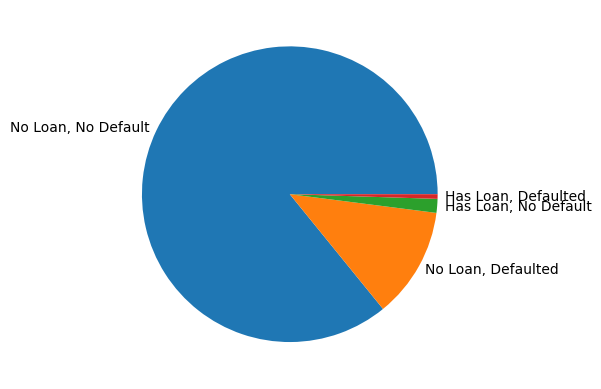

In [15]:
#shows the relationship between personal loan and credit in default

data_counts = {
    ('no', 'no'): 8500,  # e.g., Has_Loan: No, Is_Defaulted: No
    ('no', 'yes'): 1200, # e.g., Has_Loan: No, Is_Defaulted: Yes
    ('yes', 'no'): 150,  # e.g., Has_Loan: Yes, Is_Defaulted: No
    ('yes', 'yes'): 50   # e.g., Has_Loan: Yes, Is_Defaulted: Yes 
}
s = pd.Series(data_counts, name = 'count')
readable_labels = {
    ('no', 'no'): "No Loan, No Default",
    ('no', 'yes'): "No Loan, Defaulted",
    ('yes', 'no'): "Has Loan, No Default",
    ('yes', 'yes'): "Has Loan, Defaulted"   
}
labels = [readable_labels[tpl] for tpl in s.index]
plt.pie(s, labels = labels, labeldistance = 1.05)    

#most people have not defaulted the loan

This pie charts shows something distinct: 

People with no loan and defaulted: This can be due to 3 reasons: 
1. The default means defaulting on credit card payments which makes sense looking at the fact that some people hev overdrafted or has balance has 0
2. Defaulting on other non-loan debts such as utility bills, phone bills etc through credit

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

<Axes: xlabel='marital', ylabel='count'>

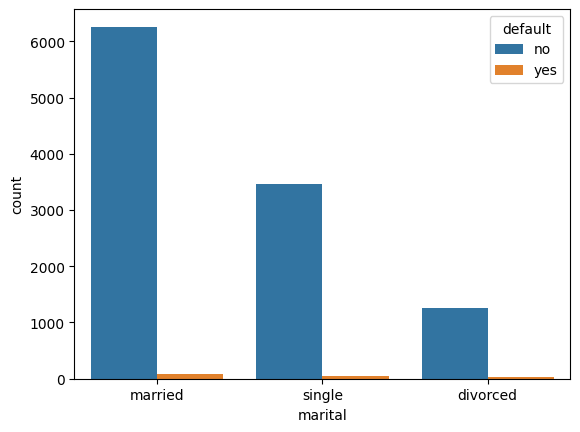

In [17]:
sns.countplot(x='marital',hue = 'default', data = df)
#divorced people are likey to have slightly higher default

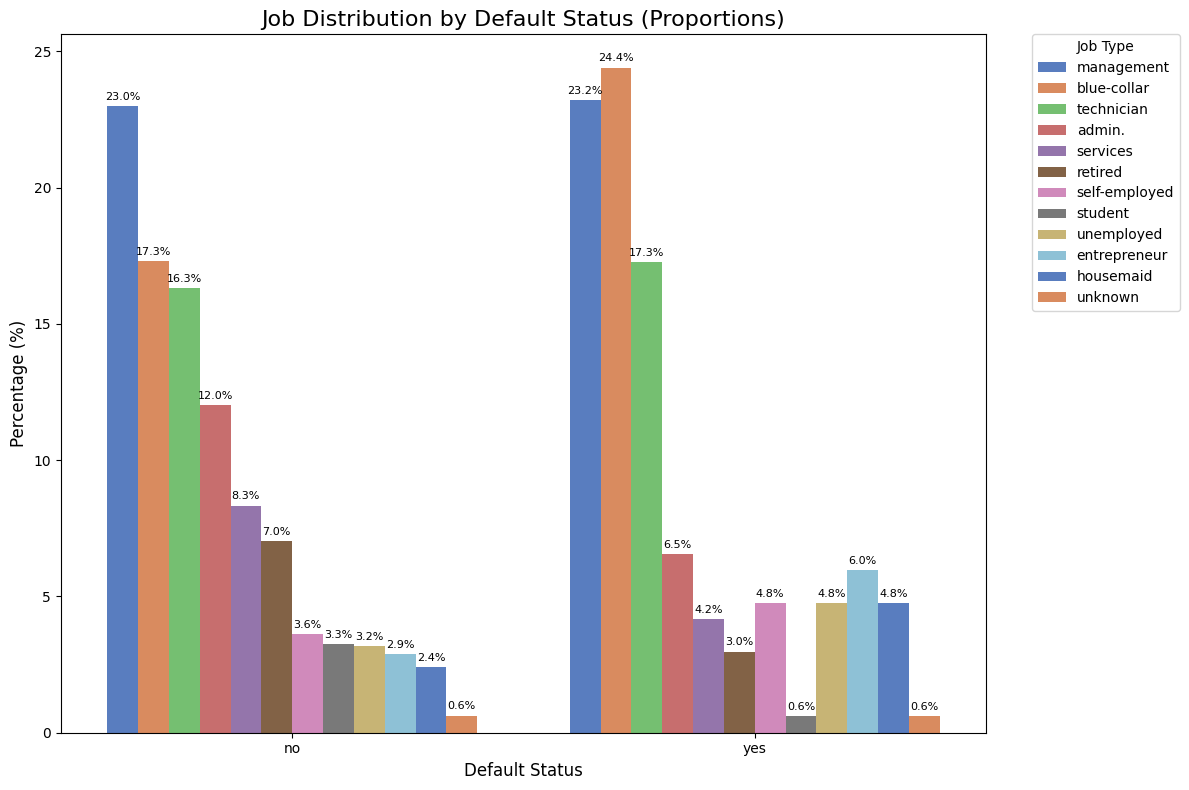

In [18]:
# Calculate proportions within each default group
# This calculates (count of job for a default) / (total count for that default)
df_proportions = df.groupby('default')['job'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
job_order = df['job'].value_counts().index
plt.figure(figsize=(12, 8))

ax = sns.barplot(
    x='default',
    y='percentage',
    hue='job',
    data=df_proportions,
    order=['no', 'yes'],
    hue_order=job_order,
    palette='muted'
)

plt.title('Job Distribution by Default Status (Proportions)', fontsize=16)
plt.xlabel('Default Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(title='Job Type', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Add percentage labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()
#mostly blue collar and management and technicien seems to have
# defaulted the credit

<Axes: xlabel='housing', ylabel='count'>

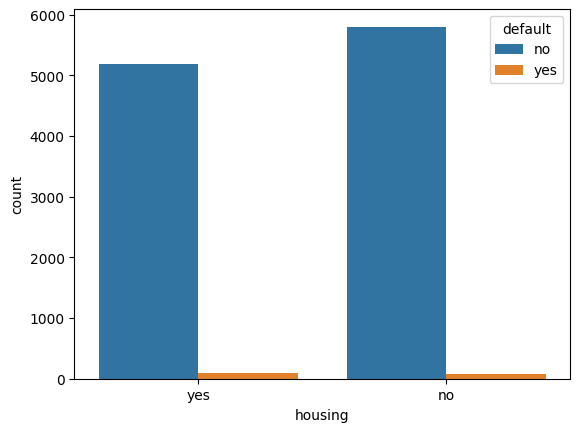

In [19]:
sns.countplot(x='housing',hue = 'default', data = df)
#a lot of people with housing loans but not a lot of defaut


Target Variable Distribution:
deposit
no     5873
yes    5289
Name: count, dtype: int64
deposit
no     52.616019
yes    47.383981
Name: proportion, dtype: float64


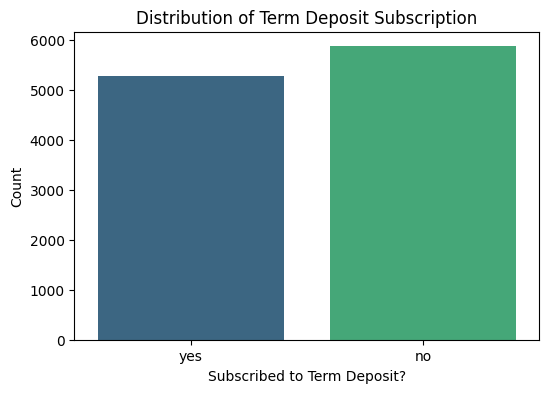

In [20]:
print("\nTarget Variable Distribution:")
print(df['deposit'].value_counts())
print(df['deposit'].value_counts(normalize=True) * 100) # Percentage

plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', data=df, palette='viridis')
plt.title('Distribution of Term Deposit Subscription')
plt.xlabel('Subscribed to Term Deposit?')
plt.ylabel('Count')
plt.show()

#mostly people are not subscribed to deposit


 Contact Type Distribution:
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
contact
cellular     72.048020
unknown      21.017739
telephone     6.934241
Name: proportion, dtype: float64


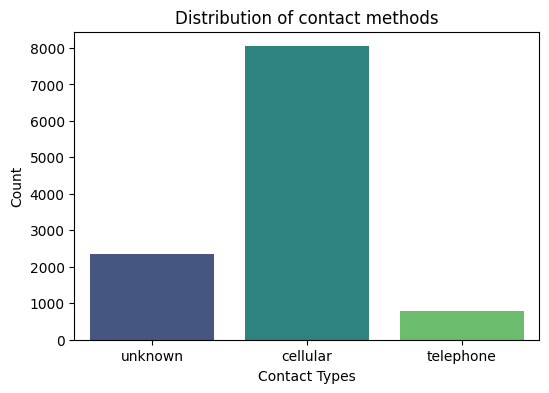

In [21]:
print("\n Contact Type Distribution:")
print(df['contact'].value_counts())
print(df['contact'].value_counts(normalize=True) * 100) # Percentage

plt.figure(figsize=(6, 4))
sns.countplot(x='contact', data=df, palette='viridis')
plt.title('Distribution of contact methods')
plt.xlabel('Contact Types')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='contact', ylabel='count'>

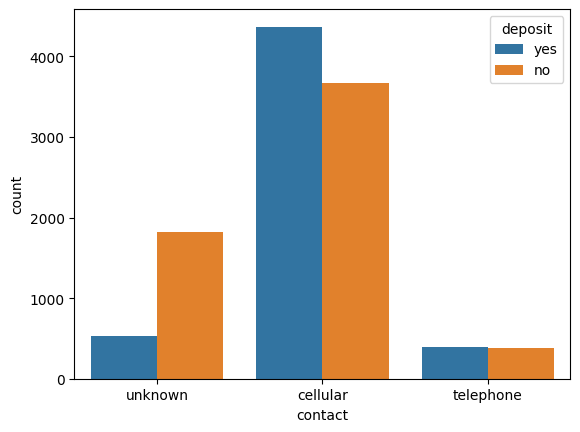

In [22]:
sns.countplot(x='contact',hue = 'deposit', data = df)
#mostly people said yes when contacted on phone

          count        mean         std  min    25%    50%    75%     max
deposit                                                                  
no       5873.0  223.130257  208.577530  2.0   94.0  163.0  282.0  3284.0
yes      5289.0  537.294574  392.525262  8.0  244.0  426.0  725.0  3881.0


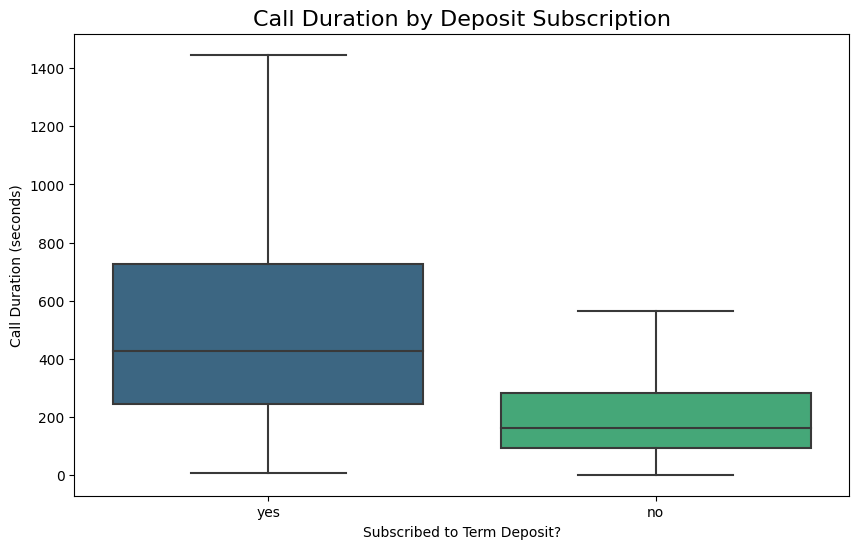

In [23]:
# Analyze duration for insight
print(df.groupby('deposit')['duration'].describe())
plt.figure(figsize=(10, 6))
sns.boxplot(x='deposit', y='duration', data=df, palette='viridis', showfliers=False) # showfliers=False to remove extreme outliers for clearer view
plt.title('Call Duration by Deposit Subscription', fontsize=16)
plt.xlabel('Subscribed to Term Deposit?')
plt.ylabel('Call Duration (seconds)')
plt.show()

#more contact/duration seems to be leading to better conversation rate

In [24]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [25]:
df['deposit_numeric'] = df['deposit'].map({'no':0,'yes': 1})

In [26]:
x = df.drop(['deposit','deposit_numeric','duration'], axis=1)
y = df['deposit_numeric']

In [27]:
x.shape

(11162, 15)

In [28]:
y.shape

(11162,)

In [29]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.3+ MB


In [30]:
categorical_features = x.select_dtypes(include='object').columns
numerical_features = x.select_dtypes(include=np.number).columns

In [31]:
#need to create a pipeline to process this better:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
numeric_transform = StandardScaler()
categoric_transform = OneHotEncoder(handle_unknown = 'ignore')

preprocessor = ColumnTransformer(
    transformers =[ ('num',numeric_transform, numerical_features),
    ('cat', categoric_transform, categorical_features)
                  ],
    remainder = 'passthrough'
)

In [32]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = .20,random_state = 42, stratify = y)


In [33]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [34]:
#handling the imbalaced dataset with SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#the first model is LogisticRegression
model = {
"lr" : LogisticRegression(class_weight = 'balanced', random_state = 42),
"rfc" : RandomForestClassifier(random_state= 42, n_estimators = 100, class_weight = 'balanced'),
"xgbc" : XGBClassifier( eval_metric = 'logloss', random_state = 42)
}


def train_and_evaluate_pipelines(models, preprocessor, X_train, y_train, X_test, y_test):
    """
    Trains and evaluates multiple classification models using an ImbPipeline
    that includes preprocessing and SMOTE oversampling.

    Args:
        models (dict): A dictionary where keys are model names (str) and values are
                       unfitted scikit-learn classifier objects.
        preprocessor (ColumnTransformer): The fitted ColumnTransformer for data preprocessing.
        x_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training target.
        x_test (pd.DataFrame): Testing features.
        y_test (pd.Series): Testing target.

    Returns:
        dict: A dictionary containing:
              - 'fitted_pipelines': A dictionary of fitted pipelines.
              - 'results': A dictionary of evaluation metrics for each model.
    """
    fitted_pipelines = {}
    results = {}

    for name, model in models.items():
        print(f"\n--- Training and Evaluating: {name} ---")

        # Create the ImbPipeline
        # It includes preprocessing, SMOTE, and the classifier
        pipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('classifier', model)
        ])

        try:
            # Fit the pipeline
            pipeline.fit(X_train, y_train)
            fitted_pipelines[name] = pipeline

            # Make predictions
            y_pred = pipeline.predict(X_test)
            y_proba = pipeline.predict_proba(X_test)[:, 1] # Probability of the positive class

            # Calculate metrics
            report = classification_report(y_test, y_pred, target_names=['No Deposit', 'Yes Deposit'], output_dict=True)
            roc_auc = roc_auc_score(y_test, y_proba)
            
            # For PR AUC
            precision, recall, _ = precision_recall_curve(y_test, y_proba)
            pr_auc = auc(recall, precision)
            
            # Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)


            results[name] = {
                'classification_report': report,
                'roc_auc': roc_auc,
                'pr_auc': pr_auc,
                'confusion_matrix': cm
            }

            # Print summary for immediate feedback
            print(f"  {name} - ROC AUC: {roc_auc:.4f}")
            print(f"  {name} - PR AUC: {pr_auc:.4f}")
            print(f"  {name} - Classification Report (Yes Deposit):\n"
                  f"    Precision: {report['Yes Deposit']['precision']:.4f}\n"
                  f"    Recall:    {report['Yes Deposit']['recall']:.4f}\n"
                  f"    F1-score:  {report['Yes Deposit']['f1-score']:.4f}")
            print(f"  {name} - Confusion Matrix:\n{cm}")


        except Exception as e:
            print(f"  Error training or evaluating {name}: {e}")
            results[name] = {'error': str(e)}

    return fitted_pipelines, results

In [35]:
fitted_pipelines, results = train_and_evaluate_pipelines(
    model,
    preprocessor,
    x_train, y_train,
    x_test, y_test
)


--- Training and Evaluating: lr ---
  lr - ROC AUC: 0.7565
  lr - PR AUC: 0.7582
  lr - Classification Report (Yes Deposit):
    Precision: 0.7091
    Recall:    0.5898
    F1-score:  0.6440
  lr - Confusion Matrix:
[[919 256]
 [434 624]]

--- Training and Evaluating: rfc ---
  rfc - ROC AUC: 0.7742
  rfc - PR AUC: 0.7713
  rfc - Classification Report (Yes Deposit):
    Precision: 0.7414
    Recall:    0.6342
    F1-score:  0.6836
  rfc - Confusion Matrix:
[[941 234]
 [387 671]]

--- Training and Evaluating: xgbc ---
  xgbc - ROC AUC: 0.7762
  xgbc - PR AUC: 0.7814
  xgbc - Classification Report (Yes Deposit):
    Precision: 0.7382
    Recall:    0.6342
    F1-score:  0.6823
  xgbc - Confusion Matrix:
[[937 238]
 [387 671]]


In [36]:
print("\n--- All Model Results Summary ---")
for name, res in results.items():
    if 'error' in res:
        print(f"{name}: Error - {res['error']}")
    else:
        print(f"\n{name}:")
        print(f"  ROC AUC: {res['roc_auc']:.4f}")
        print(f"  PR AUC:  {res['pr_auc']:.4f}")
        print(f"  F1-score (Yes Deposit): {res['classification_report']['Yes Deposit']['f1-score']:.4f}")
        print(f"  Recall (Yes Deposit): {res['classification_report']['Yes Deposit']['recall']:.4f}")
        print(f"  Precision (Yes Deposit): {res['classification_report']['Yes Deposit']['precision']:.4f}")


--- All Model Results Summary ---

lr:
  ROC AUC: 0.7565
  PR AUC:  0.7582
  F1-score (Yes Deposit): 0.6440
  Recall (Yes Deposit): 0.5898
  Precision (Yes Deposit): 0.7091

rfc:
  ROC AUC: 0.7742
  PR AUC:  0.7713
  F1-score (Yes Deposit): 0.6836
  Recall (Yes Deposit): 0.6342
  Precision (Yes Deposit): 0.7414

xgbc:
  ROC AUC: 0.7762
  PR AUC:  0.7814
  F1-score (Yes Deposit): 0.6823
  Recall (Yes Deposit): 0.6342
  Precision (Yes Deposit): 0.7382


# Summary 

#### Despite some challenges with this imbalanced dataset where only a small % of clients subscribed, the ML model developped demonstrated some strong capabilities. With PR AUC of .78 and F1 score for subscribers around.68



### Key Findings

* Clients in student, retired, and unemployed categories surprisingly showed a higher proportion of term deposit subscriptions, despite their potentially smaller absolute numbers. admin. and technician also contributed significantly in terms of absolute subscribers.
* Age: Both younger (e.g., 20-30s) and older (e.g., 60+) age groups tend to have higher subscription rates compared to middle-aged groups.
* Marital Status & Education: single clients and those with university.degree or high.school education often exhibit slightly higher subscription rates.
* Contact Method: cellular contact is significantly more effective than telephone contact in securing subscriptions. The 'unknown' contact type yielded virtually no conversions.
* Call Duration (duration): This is a key indicator, not a predictor for pre-call targeting. Calls that last longer are overwhelmingly more likely to result in a subscription. This indicates client engagement.
* Insight: An average successful call lasts significantly longer than an unsuccessful one.

# Actionable Marketing Advice for the Bank

* Prime Targets: Prioritize outreach to students, retired individuals, and unemployed clients, as well as those in admin. and technician roles.
* Age Focus: Tailor campaigns for younger adults (20-30s) and seniors (60+) as these groups are more receptive.
* Relationship Status: Consider focusing on single clients.
* Education Level: Clients with university degrees or high school education are more likely to convert.
* Channel Preference: Heavily favor cellular contact methods over telephone for direct outreach. Avoid using 'unknown' contact types.



# Please like if you found this useful :)
